In [112]:
import pandas as pd
import datetime
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [113]:
df = pd.read_csv('sms_usage.csv')

In [114]:
x = df['Usage'].values
dt  = df['Date']
# df.index = df['Date'].rename('DatetimeIndex')
train,test = x[1:len(x)-30], x[len(x)-30:]

In [115]:
train.shape,test.shape

((809,), (30,))

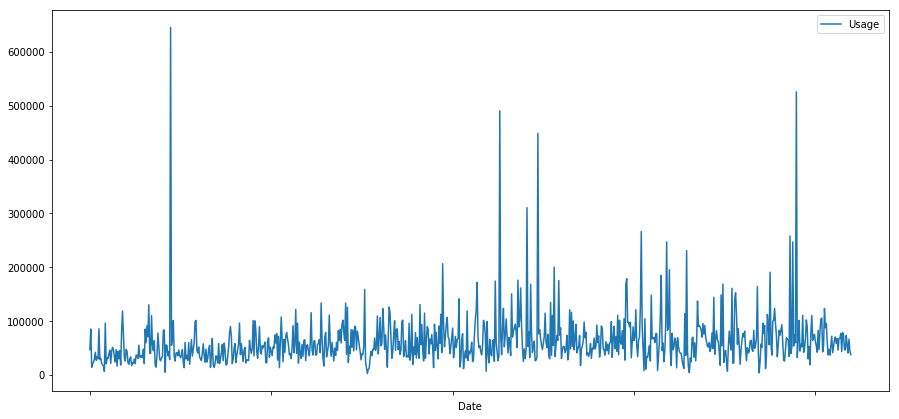

In [116]:
df.plot(figsize=(15,7),x=df['Date'],y='Usage')

In [117]:
train = train.astype('float')
test = test.astype('float')

In [118]:
history = [x for x in train]
predicted = []
a = dict()
a['date'] = df['Date']
a['usage'] = df['Usage']

In [119]:
#  ARIMA(p,d,q)x(P,D,Q), where D, P, and Q are, respectively, the number of seasonal differences,
# seasonal autoregressive terms (lags of the differenced series at multiples of the seasonal period),
# and seasonal moving average terms (lags of the forecast errors at multiples of the seasonal period).
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,0)).fit(disp=0)
    output = model.forecast()
    predicted.append(output[0])
#     obs = test[t]
    history.append(test[t])

In [120]:
test_temp  = history[-31:-1]
for i,j in zip(predicted,test_temp):
    print('Predicted: ',i,'Expected: ',j)

Predicted:  [54995.5259901] Expected:  55033.0
Predicted:  [123556.21508035] Expected:  123509.0
Predicted:  [87694.9382716] Expected:  87692.0
Predicted:  [95531.58569667] Expected:  95519.0
Predicted:  [61294.45812808] Expected:  61324.0
Predicted:  [37299.01599016] Expected:  37358.0
Predicted:  [47724.88083538] Expected:  47771.0
Predicted:  [36730.46380368] Expected:  36790.0
Predicted:  [55180.11887255] Expected:  55217.0
Predicted:  [72065.80660955] Expected:  72082.0
Predicted:  [41322.28850856] Expected:  41376.0
Predicted:  [52837.3968254] Expected:  52877.0
Predicted:  [64542.70244015] Expected:  64568.0
Predicted:  [70602.1047503] Expected:  70620.0
Predicted:  [58749.72506083] Expected:  58782.0
Predicted:  [67528.41798299] Expected:  67550.0
Predicted:  [46091.45995146] Expected:  46139.0
Predicted:  [67708.68848485] Expected:  67730.0
Predicted:  [68631.83050847] Expected:  68652.0
Predicted:  [77306.33131802] Expected:  77316.0
Predicted:  [43390.43115942] Expected:  43

In [121]:
mean_squared_error(predicted, test_temp)

1325.49901885738

In [122]:
model.params, model.k_ar

(array([-47.85185185]), 0)

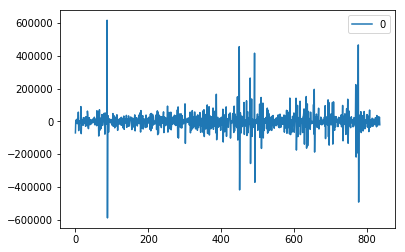

In [123]:
p = pd.DataFrame(model.resid)
p.plot()

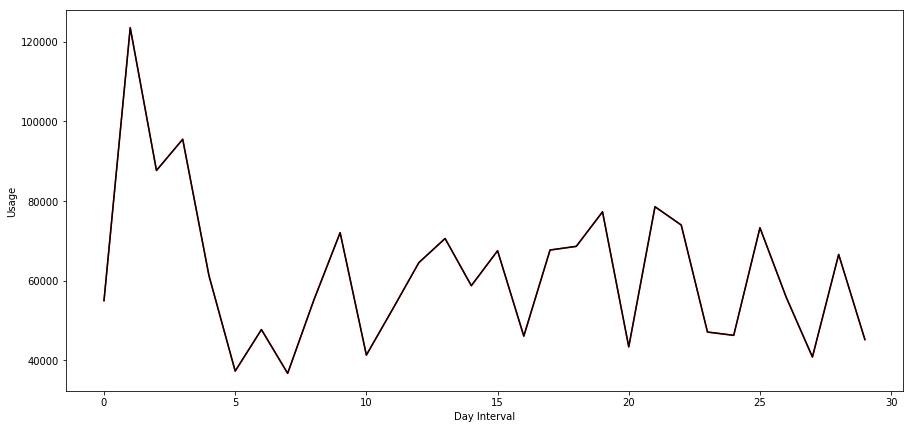

In [125]:
plt.figure(figsize=(15,7))
plt.ylabel('Usage')
plt.xlabel('Day Interval')
plt.plot(predicted,color='red')
plt.plot(test_temp,color='black')

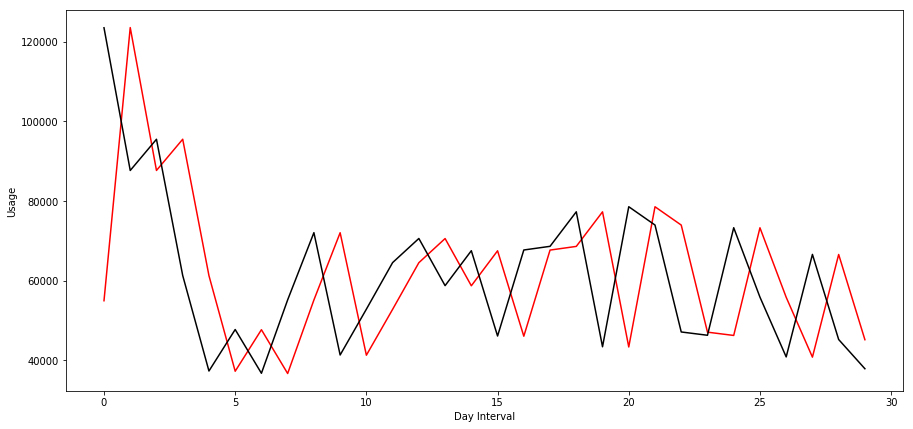

In [126]:
plt.figure(figsize=(15,7))
plt.ylabel('Usage')
plt.xlabel('Day Interval')
plt.plot(predicted,color='red')
plt.plot(test,color='black')